<a href="https://colab.research.google.com/github/SAISATHVIKK/Assignment-11-Text-Mining-01-Elon-Musk/blob/main/assignment_forecasting_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining
#how many dummy variables you have created and RMSE value for each model. Finally which model you will use for
#Forecasting.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
# Load the datasets
coca_cola_data = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')
airlines_data = pd.read_excel('/content/Airlines+Data.xlsx')

In [5]:
# Preprocess CocaCola data
coca_cola_data['Quarter'] = coca_cola_data['Quarter'].str.replace(r'Q(\d+)_(\d+)', r'\2-\1', regex=True)
coca_cola_data['Quarter'] = pd.to_datetime(coca_cola_data['Quarter'])
coca_cola_data.set_index('Quarter', inplace=True)

In [6]:
# Preprocess Airlines data
airlines_data['Month'] = pd.to_datetime(airlines_data['Month'], format='%b-%y')
airlines_data.set_index('Month', inplace=True)

In [7]:
# Function to create SARIMA model and calculate RMSE
def fit_sarima(data, order, seasonal_order):
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    y_pred = model_fit.predict()
    rmse = sqrt(mean_squared_error(data, y_pred))
    return model_fit, y_pred, rmse

In [8]:
# Create SARIMA model for CocaCola data
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 4)  # Assuming quarterly seasonality
coca_cola_model, coca_cola_pred, coca_cola_rmse = fit_sarima(coca_cola_data, order, seasonal_order)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [9]:
# Create SARIMA model for Airlines data
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Assuming yearly seasonality
airlines_model, airlines_pred, airlines_rmse = fit_sarima(airlines_data, order, seasonal_order)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


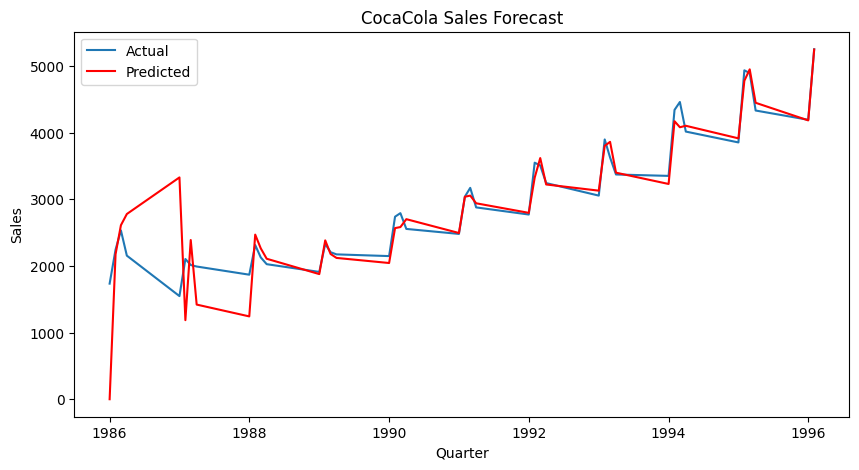

In [10]:
# Plot actual vs. predicted for CocaCola
plt.figure(figsize=(10, 5))
plt.plot(coca_cola_data, label='Actual')
plt.plot(coca_cola_pred, label='Predicted', color='red')
plt.title('CocaCola Sales Forecast')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.show()

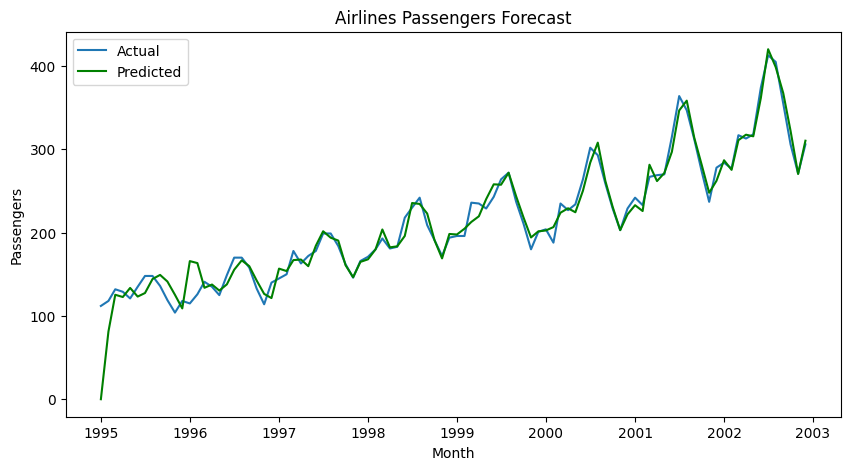

In [11]:
# Plot actual vs. predicted for Airlines
plt.figure(figsize=(10, 5))
plt.plot(airlines_data, label='Actual')
plt.plot(airlines_pred, label='Predicted', color='green')
plt.title('Airlines Passengers Forecast')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [12]:
# Print RMSE values for both models
print("RMSE for CocaCola SARIMA model:", coca_cola_rmse)
print("RMSE for Airlines SARIMA model:", airlines_rmse)

RMSE for CocaCola SARIMA model: 458.7221660653963
RMSE for Airlines SARIMA model: 16.979292874396563


In [13]:
# Select the model with lower RMSE for forecasting
if coca_cola_rmse < airlines_rmse:
    print("CocaCola SARIMA model selected for forecasting.")
    selected_model = coca_cola_model
else:
    print("Airlines SARIMA model selected for forecasting.")
    selected_model = airlines_model

Airlines SARIMA model selected for forecasting.
